In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pickle import load

In [2]:
SCRIPTPATH = '/Users/marcosaponara/Documents/GitHub/centipede-bias/mysrc/utils/script1.py'
NBSTEPS = 6
EPS1 = 0.186
EPS2 = 0.062
Z = 100

In [3]:
!python $SCRIPTPATH --eps $EPS1 --nbsteps $NBSTEPS --popsize $Z

/Users/marcosaponara/opt/anaconda3/lib/python3.9/site-packages/egttools/utils.py:214: RuntimeWarning: Some of the entries in the transition matrix are close to 1 (with a tolerance of 1e-11). This could result in more than one eigenvalue of magnitute 1 (the Markov Chain is degenerate), so please be careful when analysing the results.
  warn(
dictionary saved successfully to file ./results/fig1-Z=100-nbstep=6-eps=0.186.pkl


In [4]:
!python $SCRIPTPATH --eps $EPS2 --nbsteps $NBSTEPS --popsize $Z

dictionary saved successfully to file ./results/fig1-Z=100-nbstep=6-eps=0.062.pkl


In [5]:
cmap1 = mpl.colormaps['magma']
cmap2 = mpl.colormaps['inferno']

colors1 = cmap1(np.linspace(0, 1, 5))
colors2 = cmap2(np.linspace(0, 1, NBSTEPS+1))

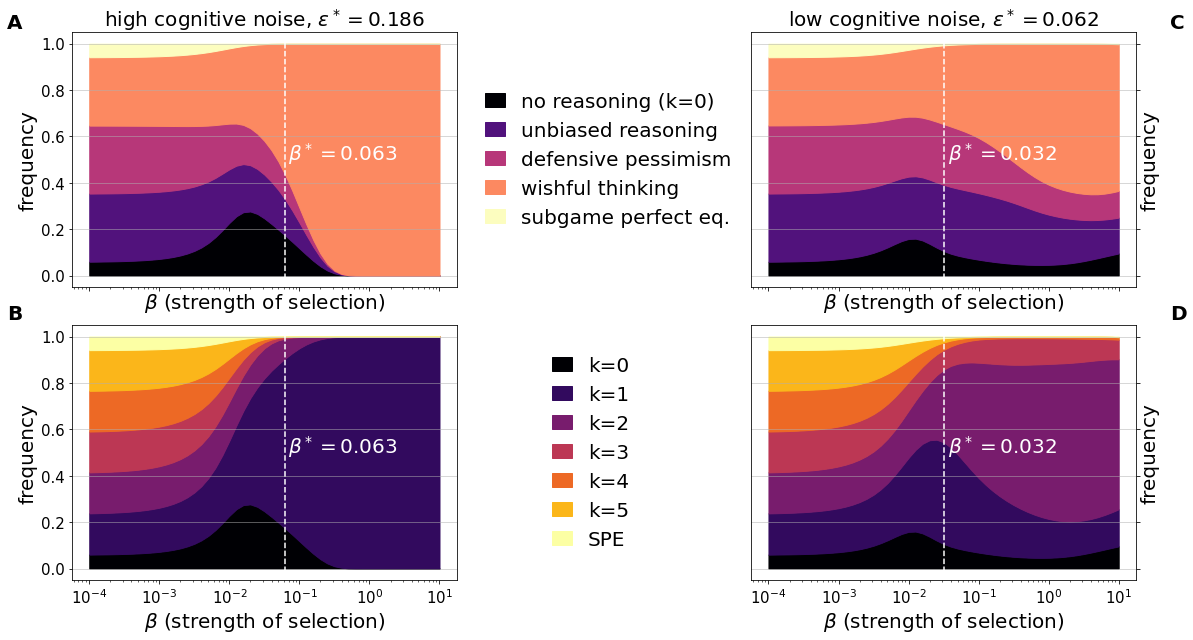

In [6]:
nb_steps = NBSTEPS
eps_values = [EPS1, EPS2] 
beta_opt_values = [0.063, 0.032]

titles = [fr'high cognitive noise, $\epsilon^*=${eps_values[0]}', 
          fr'low cognitive noise, $\epsilon^*=${eps_values[1]}'
         ]
    
fig, ax = plt.subplots(2,2, figsize=(17,9), sharex=True, sharey=True)


for n, eps in enumerate(eps_values):
    file_name = f'./results/fig1-Z={Z}-nbstep={nb_steps}-eps={eps}.pkl'
    with open(file_name, 'rb') as f:
        res = load(f)
    strategy_labels = res['strategy_labels']
    beta_values = res['beta_values']
    results_fig1 = res['results_fig1']
    
    nb_strategies = len(strategy_labels)
    
    idx_neu = [i for i in range(nb_strategies) if strategy_labels[i][1:]=="neu"]
    idx_pes = [i for i in range(nb_strategies) if strategy_labels[i][1:]=="pes"]
    idx_opt = [i for i in range(nb_strategies) if strategy_labels[i][1:]=="opt"]
    
    cum_frequency0 = results_fig1[:,0]
    cum_frequency1 = cum_frequency0 + results_fig1[:,idx_neu].sum(axis=1)
    cum_frequency2 = cum_frequency1 + results_fig1[:,idx_pes].sum(axis=1)
    cum_frequency3 = cum_frequency2 + results_fig1[:,idx_opt].sum(axis=1)
    cum_frequency4 = cum_frequency3 + results_fig1[:,-1]
    
    assert np.allclose(cum_frequency4, 1.)
    
    #print(np.min(beta_values[results_fig1[:,idx_opt].sum(axis=1)>.99]))
    ax[0, n].set_title(titles[n], fontsize=20)
    
    ax[0, n].grid(axis='y', linewidth=0.5)
    ax[0, n].fill_between(beta_values, 0, cum_frequency0, label='no reasoning (k=0)', color=colors1[0])
    ax[0, n].fill_between(beta_values, cum_frequency0, cum_frequency1, label='unbiased reasoning', color=colors1[1])
    ax[0, n].fill_between(beta_values, cum_frequency1, cum_frequency2, label='defensive pessimism', color=colors1[2])
    ax[0, n].fill_between(beta_values, cum_frequency2, cum_frequency3, label='wishful thinking', color=colors1[3])
    ax[0, n].fill_between(beta_values, cum_frequency3, 1., label='subgame perfect eq.', color=colors1[4])
    ax[0, n].axvline(beta_opt_values[n], color='white', linestyle='--')
    ax[0, n].text(beta_opt_values[n]+0.005, .5, r'$\beta^*=$'+str(np.round(beta_opt_values[n],3)), color='white', fontsize=20)

    ax[0, n].set_xlabel(r'$\beta$ (strength of selection)', fontsize = 20)
    ax[0, n].set_ylabel(r'frequency', fontsize = 20)
    ax[0, n].set_ylim(-.05, 1.05)
    ax[0, n].set_xscale('log')
    
    cum_frequency = cum_frequency0
    
    ax[1, n].grid(axis='y', linewidth=0.5)
    ax[1, n].fill_between(beta_values, 0, cum_frequency, label='k=0',color=colors2[0])
    for k in range(1, nb_steps):
        ax[1, n].fill_between(beta_values, cum_frequency, cum_frequency+results_fig1[:,k:-1:(nb_steps-1)].sum(axis=1), label='k='+str(k),color=colors2[k])
        cum_frequency += results_fig1[:,k:-1:(nb_steps-1)].sum(axis=1) 
    ax[1, n].fill_between(beta_values, cum_frequency, cum_frequency+results_fig1[:,-1], label='SPE',color=colors2[-1])
    
    ax[1, n].axvline(beta_opt_values[n], color='white', linestyle='--')
    ax[1, n].text(beta_opt_values[n]+0.005, .5, r'$\beta^*=$'+str(np.round(beta_opt_values[n],3)), color='white', fontsize=20)
    
    ax[1, n].set_xlabel(r'$\beta$ (strength of selection)', fontsize = 20)
    ax[1, n].set_ylabel(r'frequency', fontsize = 20)
    ax[1, n].set_ylim(-.05, 1.05)
    ax[1, n].set_xscale('log')
    
ax[0, 0].legend(loc='center left', bbox_to_anchor=(1.025, 0.5), fontsize = 20, frameon=False,handlelength=1)
ax[1, 0].legend(loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize = 20, frameon=False,handlelength=1)

ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()

ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()

fig.text(0., .95, 'A', fontsize=20, fontweight='heavy')
fig.text(.95, .95, 'C', fontsize=20, fontweight='heavy')
fig.text(0., .5, 'B', fontsize=20, fontweight='heavy')
fig.text(.95, .5, 'D', fontsize=20, fontweight='heavy')

ax[0,0].xaxis.set_tick_params(labelsize=15)
ax[1,0].xaxis.set_tick_params(labelsize=15)
ax[0,1].xaxis.set_tick_params(labelsize=15)
ax[1,1].xaxis.set_tick_params(labelsize=15)

ax[0,0].yaxis.set_tick_params(labelsize=15)
ax[1,0].yaxis.set_tick_params(labelsize=15)
ax[0,1].yaxis.set_tick_params(labelsize=15)
ax[1,1].yaxis.set_tick_params(labelsize=15)

# Adjust layout so the legend doesn't overlap the plot
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave some space on the right for the legend
plt.savefig(f'./figures/icg6-effect-of-beta-Z{Z}.png', format='png')
plt.savefig(f'./figures/icg6-effect-of-beta-Z{Z}.eps', format='eps')
plt.show()